In [2]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
import os
os.chdir(r'G:\upes\sem 3\Major Project\Dataset\Landslide_Detection')

In [7]:
# Testing single image from the dataset 
path_single = r"Data/img/image_2000.h5"
path_single_mask = r'Data/mask/mask_2000.h5'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


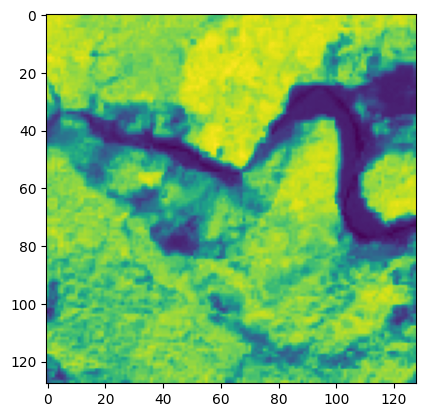

In [8]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


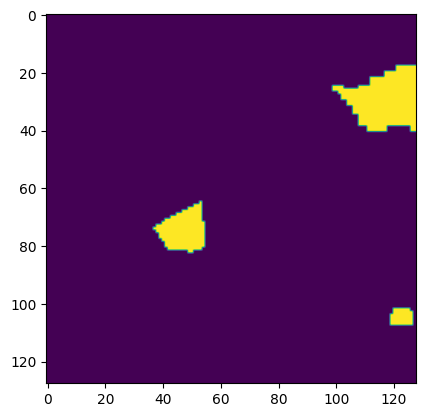

In [9]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [10]:
path_single = r"Data/img/image_10.h5"
path_single_mask = r'Data/mask/mask_10.h5'
TRAIN_PATH = r"Data/img/*.h5"
TRAIN_MASK = r'Data/mask/*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [8]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 Data/img\image_1.h5 Data/mask\mask_1.h5
1 Data/img\image_10.h5 Data/mask\mask_10.h5
2 Data/img\image_100.h5 Data/mask\mask_100.h5
3 Data/img\image_1000.h5 Data/mask\mask_1000.h5
4 Data/img\image_1001.h5 Data/mask\mask_1001.h5
5 Data/img\image_1002.h5 Data/mask\mask_1002.h5
6 Data/img\image_1003.h5 Data/mask\mask_1003.h5
7 Data/img\image_1004.h5 Data/mask\mask_1004.h5
8 Data/img\image_1005.h5 Data/mask\mask_1005.h5
9 Data/img\image_1006.h5 Data/mask\mask_1006.h5
10 Data/img\image_1007.h5 Data/mask\mask_1007.h5
11 Data/img\image_1008.h5 Data/mask\mask_1008.h5
12 Data/img\image_1009.h5 Data/mask\mask_1009.h5
13 Data/img\image_101.h5 Data/mask\mask_101.h5
14 Data/img\image_1010.h5 Data/mask\mask_1010.h5
15 Data/img\image_1011.h5 Data/mask\mask_1011.h5
16 Data/img\image_1012.h5 Data/mask\mask_1012.h5
17 Data/img\image_1013.h5 Data/mask\mask_1013.h5
18 Data/img\image_1014.h5 Data/mask\mask_1014.h5
19 Data/img\image_1015.h5 Data/mask\mask_1015.h5
20 Data/img\image_1016.h5 Data/mask\mask_101

C:\Users\DELL\AppData\Local\Temp\ipykernel_1592\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1671 Data/img\image_2502.h5 Data/mask\mask_2502.h5
1672 Data/img\image_2503.h5 Data/mask\mask_2503.h5
1673 Data/img\image_2504.h5 Data/mask\mask_2504.h5
1674 Data/img\image_2505.h5 Data/mask\mask_2505.h5
1675 Data/img\image_2506.h5 Data/mask\mask_2506.h5
1676 Data/img\image_2507.h5 Data/mask\mask_2507.h5
1677 Data/img\image_2508.h5 Data/mask\mask_2508.h5
1678 Data/img\image_2509.h5 Data/mask\mask_2509.h5
1679 Data/img\image_251.h5 Data/mask\mask_251.h5
1680 Data/img\image_2510.h5 Data/mask\mask_2510.h5
1681 Data/img\image_2511.h5 Data/mask\mask_2511.h5
1682 Data/img\image_2512.h5 Data/mask\mask_2512.h5
1683 Data/img\image_2513.h5 Data/mask\mask_2513.h5
1684 Data/img\image_2514.h5 Data/mask\mask_2514.h5
1685 Data/img\image_2515.h5 Data/mask\mask_2515.h5
1686 Data/img\image_2516.h5 Data/mask\mask_2516.h5
1687 Data/img\image_2517.h5 Data/mask\mask_2517.h5
1688 Data/img\image_2518.h5 Data/mask\mask_2518.h5
1689 Data/img\image_2519.h5 Data/mask\mask_2519.h5
1690 Data/img\image_252.h5 Data/m

C:\Users\DELL\AppData\Local\Temp\ipykernel_1592\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2264 Data/img\image_3036.h5 Data/mask\mask_3036.h5
2265 Data/img\image_3037.h5 Data/mask\mask_3037.h5
2266 Data/img\image_3038.h5 Data/mask\mask_3038.h5
2267 Data/img\image_3039.h5 Data/mask\mask_3039.h5
2268 Data/img\image_304.h5 Data/mask\mask_304.h5
2269 Data/img\image_3040.h5 Data/mask\mask_3040.h5
2270 Data/img\image_3041.h5 Data/mask\mask_3041.h5
2271 Data/img\image_3042.h5 Data/mask\mask_3042.h5
2272 Data/img\image_3043.h5 Data/mask\mask_3043.h5
2273 Data/img\image_3044.h5 Data/mask\mask_3044.h5
2274 Data/img\image_3045.h5 Data/mask\mask_3045.h5
2275 Data/img\image_3046.h5 Data/mask\mask_3046.h5
2276 Data/img\image_3047.h5 Data/mask\mask_3047.h5
2277 Data/img\image_3048.h5 Data/mask\mask_3048.h5
2278 Data/img\image_3049.h5 Data/mask\mask_3049.h5
2279 Data/img\image_305.h5 Data/mask\mask_305.h5
2280 Data/img\image_3050.h5 Data/mask\mask_3050.h5
2281 Data/img\image_3051.h5 Data/mask\mask_3051.h5
2282 Data/img\image_3052.h5 Data/mask\mask_3052.h5
2283 Data/img\image_3053.h5 Data/ma

In [9]:
# TRAIN_XX_n = TRAIN_XX / TRAIN_XX.max()
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


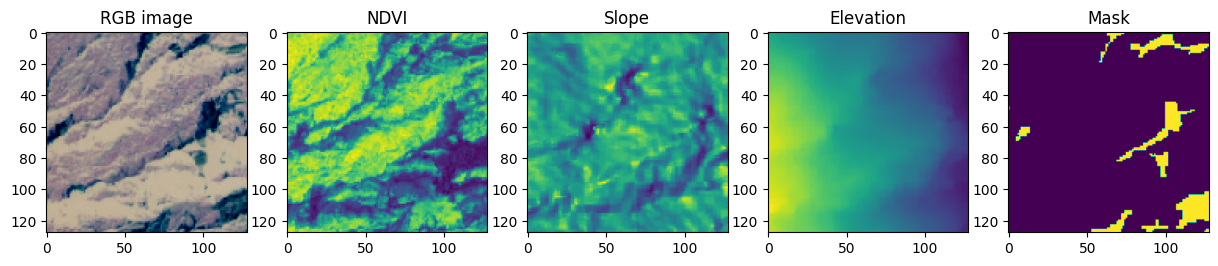

In [11]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [15]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.2, shuffle= True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


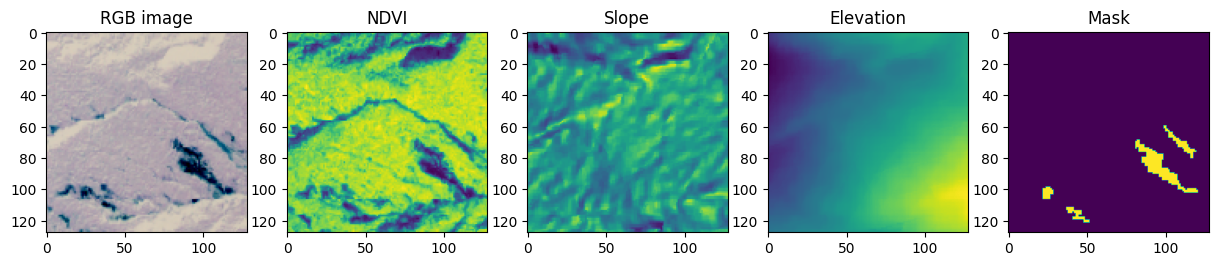

In [15]:
img=1570
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [16]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [17]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


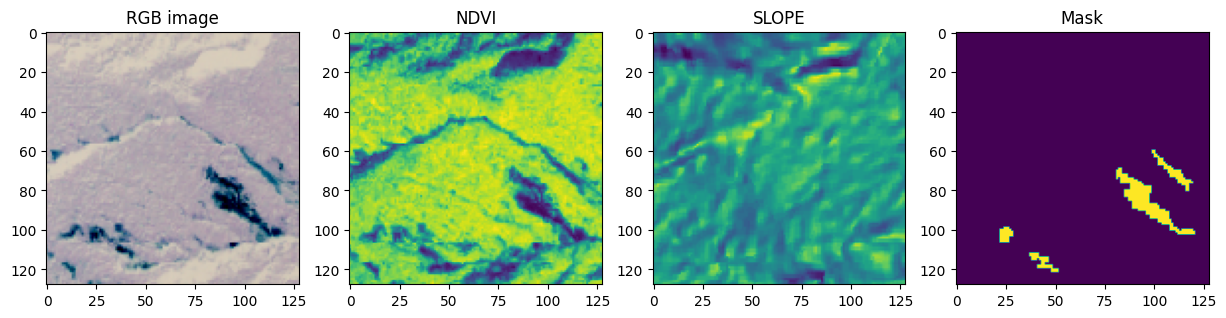

In [19]:
img=1570
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [23]:
from utils import recall_m, precision_m, f1_m
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))



    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])
    
    return model


In [22]:
model = unet_model(128, 128, 6)
# model.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

callbacks = [
    # earlyStopping,
    checkpointer
    ]
history = model.fit(x_train, y_train, batch_size=16,  
          epochs=100, 
          verbose = 2,
          validation_data=(x_valid, y_valid),
          callbacks=callbacks)

model.save("model_save.h5")

Epoch 1/100

Epoch 1: val_f1_m improved from -inf to 0.51938, saving model to best_model.keras
190/190 - 261s - 1s/step - accuracy: 0.9790 - f1_m: 0.2632 - loss: 0.0699 - precision_m: 0.5631 - recall_m: 0.2170 - val_accuracy: 0.9813 - val_f1_m: 0.5194 - val_loss: 0.0503 - val_precision_m: 0.7228 - val_recall_m: 0.4187
Epoch 2/100

Epoch 2: val_f1_m improved from 0.51938 to 0.62293, saving model to best_model.keras
190/190 - 224s - 1s/step - accuracy: 0.9848 - f1_m: 0.5961 - loss: 0.0406 - precision_m: 0.7239 - recall_m: 0.5283 - val_accuracy: 0.9844 - val_f1_m: 0.6229 - val_loss: 0.0404 - val_precision_m: 0.7440 - val_recall_m: 0.5447
Epoch 3/100

Epoch 3: val_f1_m improved from 0.62293 to 0.65449, saving model to best_model.keras
190/190 - 255s - 1s/step - accuracy: 0.9860 - f1_m: 0.6201 - loss: 0.0369 - precision_m: 0.7585 - recall_m: 0.5413 - val_accuracy: 0.9849 - val_f1_m: 0.6545 - val_loss: 0.0430 - val_precision_m: 0.7099 - val_recall_m: 0.6174
Epoch 4/100

Epoch 4: val_f1_m did

In [23]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.03436305746436119 0.9869001507759094 0.7186705470085144 0.7696358561515808 0.6772648692131042


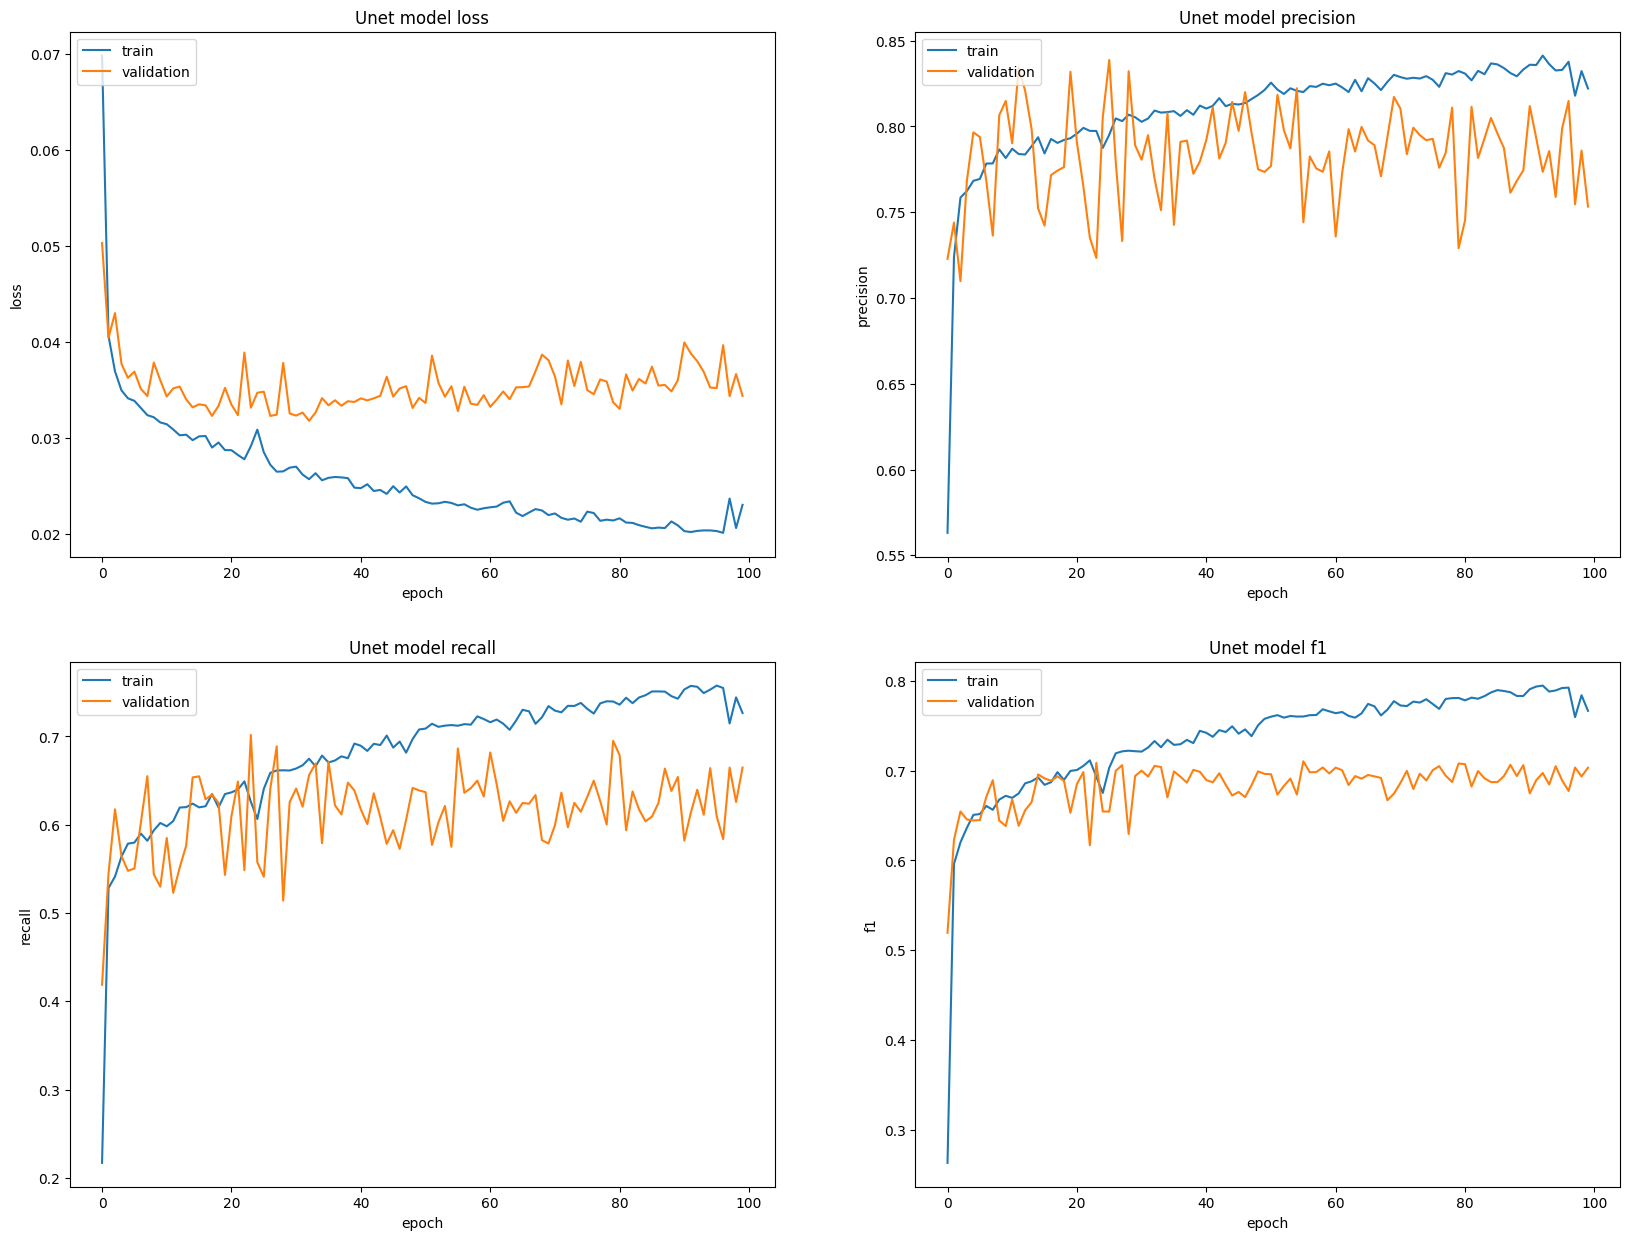

In [24]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('Unet model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')